# 1.6.01 Meanshif and Camshiftt

<h3>
    <ul>
        <li>We will learn about Meanshif and Camshiftt algorithm to find and track objects in videos.</li>
    </ul>
</h3>

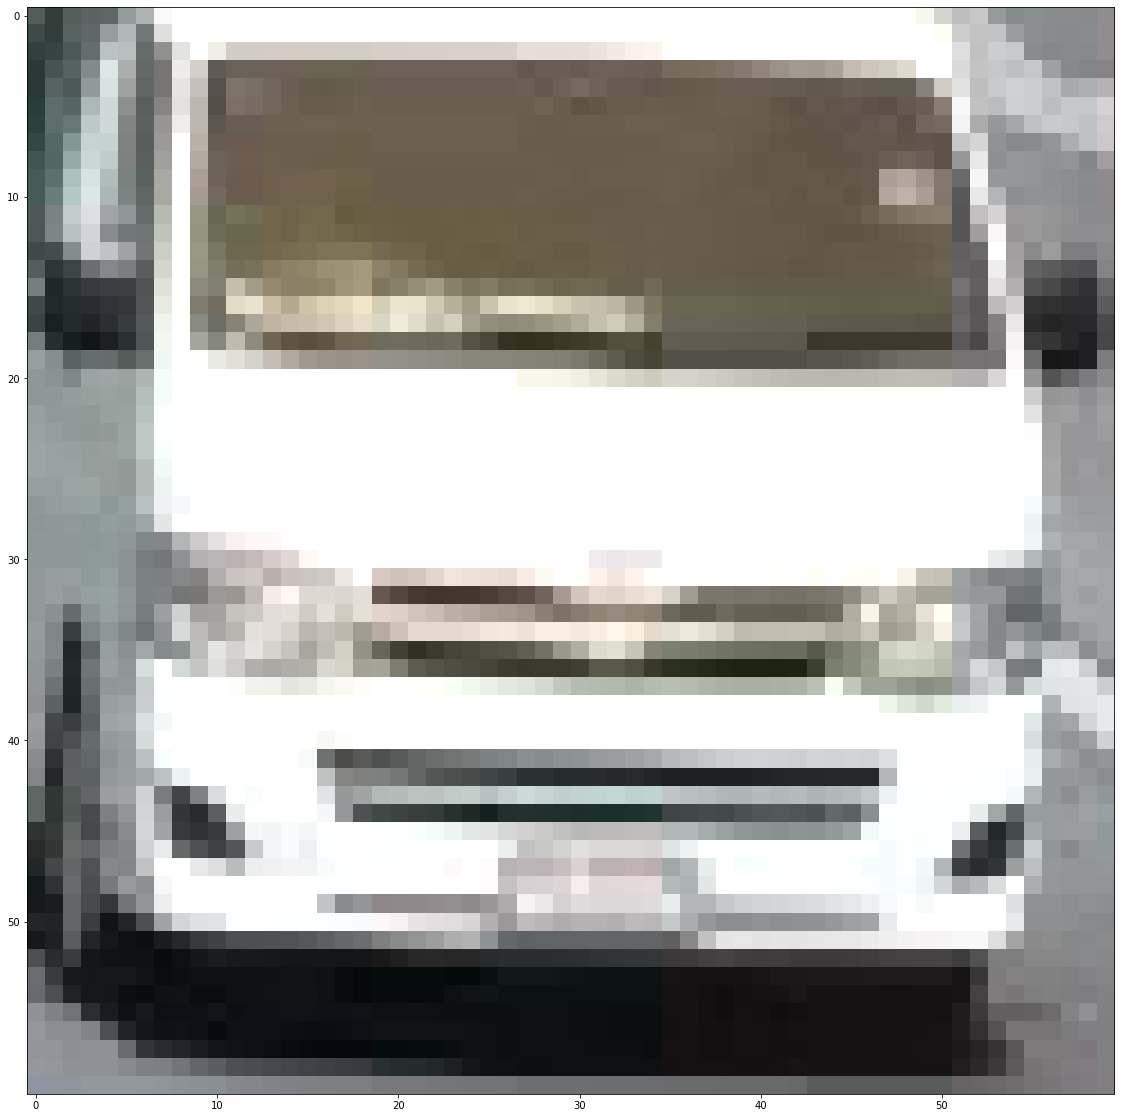

In [106]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('monitoring_720p.avi')

# take first frame of the video
ret, frame = cap.read()

# setup initial location of window
r,h,c,w = 165,60,605,60 # simply hardcoded the values
track_window = (c, r, w, h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]   
plt.figure(figsize=(20,20)) 
plt.imshow(roi), plt.show()    
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while(1) :
    ret, frame = cap.read()
    
    if ret == True :
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # Draw it on image
        x, y, w, h = track_window
        img2 = cv2.rectangle(frame, (x, y), (x+w, y+h), 255, 2)
        cv2. imshow('img2', img2)
        
        k = cv2.waitKey(60) & 0xff
        if k == 27 :
            break
        else :
            cv2.imwrite(chr(k)+".jpg", img2)
            
    else :
        break
        
cv2.destroyAllWindows()
cap.release()
            